<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/sklearn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 랜덤성을 부여하지 않고 잘래낸 경우
- Shuffle 수행을 하지 않음

In [ ]:
# 여기서 []는 X 데이터의 차원을 줄여주는 것이라고 볼 수 있음.
# 0행의 0열번째 데이터를 출력한다는 의미
X[0][0]

# 위의 작성법이 번거로워 아래의 작성법으로 변경.
# 왼쪽 0 : axis 0 -> X축 방향으로 합산
# 오른쪽 0 : axis 1 -> Y축 방향으로 합산
X[0, 0]

5.1

In [ ]:
test_size = 50
X_test = X[ : test_size]
y_test = y[ : test_size]
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
X_train = X[test_size :]
y_train = y[test_size :]
print(y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score # 모델의 예측 성능을 평가하는 라이브러리
# 모델 객체 dt_clf 생성
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

acc_result = accuracy_score(y_test, pred)

print("예측 스코어 : {:.4f}".format(acc_result))

예측 스코어 : 0.0000


# train_test_split 활용하기

In [ ]:
from sklearn.model_selection import train_test_split
X_trian, X_test, y_train, y_test = train_test_split(
    # X : feature
    # y : target
    X,
    y,
    test_size = 0.3,
    random_state = 121
)

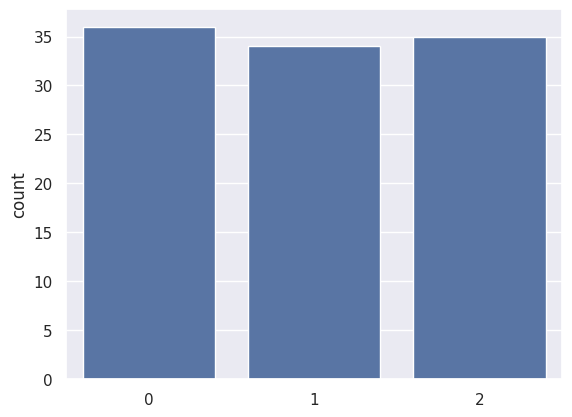

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

sns.countplot(x = y_train)
plt.show()

# Stratify 옵션 활용하기

In [ ]:
from sklearn.model_selection import train_test_split
X_trian, X_test, y_train, y_test = train_test_split(
    # X : feature
    # y : target
    X,
    y,
    test_size = 0.3,
    random_state = 121,
    stratify=y # 정수, 문자열와 같은 카테고리화 데이터만 지정이 가능
)

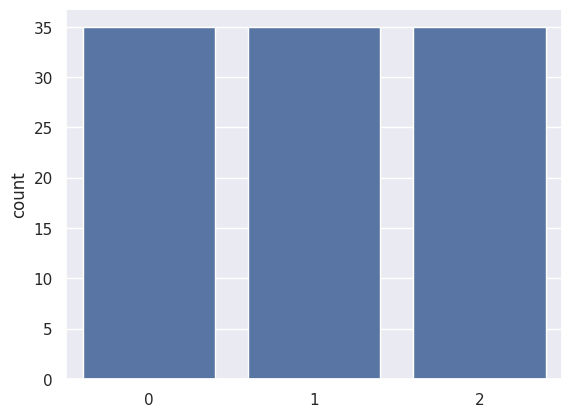

In [ ]:
sns.countplot(x = y_train)
plt.show()

# K-Fold, Stratified K-Fold

In [26]:
# K-Fold
from sklearn.model_selection import KFold
import numpy as np

In [27]:
# K-Fold
from sklearn.model_selection import KFold
import numpy as np

# 3개의 폴드 세트로 분리하는 KFold 객체 생성
# 3번을 교차 검증하는 것.
# 전체 데이터         검증1
# 전체 데이터     검증2
# 전체 데이터 검증3
kfold = KFold(n_splits=3)

# KFold 객체의 split() 함수를 호출하면 폴드 별 학습용, 검증용 테스트의 인덱스를 array로 반환
for train_indices, valid_indices in kfold.split(X):
  print("검증 세트의 인덱스 : {}".format(valid_indices))
  print("훈련 세트의 인덱스 : {}".format(train_indices))
  print()

검증 세트의 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
훈련 세트의 인덱스 : [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]

검증 세트의 인덱스 : [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
훈련 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 

In [28]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열 -> KFold가 3개이므로 3개가 만들어짐.

kfold = KFold(n_splits=3)

for train_indices, valid_indices in kfold.split(X):

  # 반환된 인덱스를 이용해 학습용(train), 검증용(vaild) 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 생성 및 훈련
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성과 동시에 훈련

  # 예측
  pred = dt_clf.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.0000
2 번째 폴드에 대한 평가 결과 : 0.0000
3 번째 폴드에 대한 평가 결과 : 0.0000

최종 결과 : 0.0


In [29]:
# Stratified K Fold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3)

# y에 들어있는 값을 기준으로 계층적 분할을 한다.
# y값을 기준으로 train과 valid 데이터를 분할한다.
for train_indices, valid_indices in skfold.split(X, y):
  print("검증 세트의 인덱스 : {}".format(valid_indices))
  print()

  class_, counts = np.unique(y[valid_indices], return_counts=True)
  classes = dict(zip(class_, counts))
  print("클래스 0 : {}개 / 클래스 1 : {}개 / 클래스 2 : {}개".format(classes[0], classes[1], classes[2]))
  print("="*50)
  print()

검증 세트의 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

클래스 0 : 17개 / 클래스 1 : 17개 / 클래스 2 : 16개

검증 세트의 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

클래스 0 : 17개 / 클래스 1 : 16개 / 클래스 2 : 17개

검증 세트의 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

클래스 0 : 16개 / 클래스 1 : 17개 / 클래스 2 : 17개



## Stratified K Fold 교차검증

In [30]:
n_iter = 0
cv_accuracy = [] # 각 폴드에서의 정확도를 담을 배열

skfold = StratifiedKFold(n_splits=3)

for train_indices, valid_indices in skfold.split(X, y):

  # 반환된 인덱스를 이용해 학습용, 검증용 데이터를 추출
  X_train, X_valid = X[train_indices], X[valid_indices]
  y_train, y_valid = y[train_indices], y[valid_indices]

  # 모델 생성 및 훈련
  dt_clf = DecisionTreeClassifier().fit(X_train, y_train) # 모델 객체 생성과 동시에 훈련

  # 예측
  pred = dt_clf.predict(X_valid)

  # 평가
  acc = accuracy_score(y_valid, pred)

  # 해당 폴드의 평가 결과를 배열에 저장
  cv_accuracy.append(acc)

  n_iter += 1
  print("{} 번째 폴드에 대한 평가 결과 : {:.4f}".format(n_iter, acc))

print()
print("최종 결과 : {}".format(np.mean(cv_accuracy)))

1 번째 폴드에 대한 평가 결과 : 0.9800
2 번째 폴드에 대한 평가 결과 : 0.9400
3 번째 폴드에 대한 평가 결과 : 0.9800

최종 결과 : 0.9666666666666667


# cross_val_score
K-Fold 클래스를 이용한 교차 검증 방법을 간편화 한 사이킷런의 검증 함수

폴드 세트 추출, 학습/예측, 평가를 한번에 수행할 수 있다.

- estimator : 모델
- X : feature
- y : target
- scoring : 예측 성능 평가 방식
- cv : 폴드의 개수

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    DecisionTreeClassifier(), # Classifier가 들어가면 자동으로 Stratified KFold를 사용.
    X,
    y,
    scoring='accuracy', # 성능 측정 방식. 여기서는 정확도를 사용
    cv=3 # 폴드의 개수
)
print("폴드 별 정확도 확인 : {}".format(scores))
print("평균 정확도 확인 : {}".format(np.mean(scores)))

폴드 별 정확도 확인 : [0.98 0.94 0.96]
평균 정확도 확인 : 0.96
